In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
acs = pd.read_csv("acs_data2.csv", skiprows = 1)
pd.set_option('display.max_columns', None)
acs
#is this enough info ?
#use skiprows parameter? -> #skiprows = 1
#how will this be cleaned ?

,id,Geographic Area Name,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Percent!!EMPLOYMENT STATUS!!Population 16 years and over,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,Estimate!!EMPLOYMENT STATUS!!Civilian labor force,Margin of Error!!EMPLOYMENT STATUS!!Civilian labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Civilian labor force,Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Margin of Error!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Percent Margin of Error!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Estimate!!EMPLOYMENT STATUS!!Females 16 years and over,Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over,Percent!!EMPLOYMENT STATUS!!Females 16 years and over,Percent Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over,Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force,Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force,Percent!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Fem

In [3]:
acs19 = acs[["id", 
       "Geographic Area Name", 
       "Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate", 
       "Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households", 
       "Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)",
       "Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!Mean household income (dollars)", 
       ]]
acs19

,id,Geographic Area Name,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households,Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars),Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!Mean household income (dollars)
0,0400000US36,New York,4.4,7446812,72108,107355
1,0500000US36005,"Bronx County, New York",9.1,513890,41432,59664
2,0500000US36047,"Kings County, New York",4.5,978091,66937,99472
3,0500000US36061,"New York County, New York",4.2,768203,93651,170453
4,0500000US36081,"Queens County, New York",4.6,784552,73696,96631
5,0500000US36085,"Richmond County, New York",4.0,166297,89821,113245


In [4]:
acs19.rename(columns = {"id":"id#", 
                          "Geographic Area Name": "area",
    "Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate" : "unemployment_rate(%)", 
    "Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households" : "total_income", 
    "Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)" : "med_income",
    "Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!Mean household income (dollars)" : "avg_income", 
                            },
               inplace = True)

/usr/local/lib/python3.4/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [5]:
acs19

,id#,area,unemployment_rate(%),total_income,med_income,avg_income
0,0400000US36,New York,4.4,7446812,72108,107355
1,0500000US36005,"Bronx County, New York",9.1,513890,41432,59664
2,0500000US36047,"Kings County, New York",4.5,978091,66937,99472
3,0500000US36061,"New York County, New York",4.2,768203,93651,170453
4,0500000US36081,"Queens County, New York",4.6,784552,73696,96631
5,0500000US36085,"Richmond County, New York",4.0,166297,89821,113245


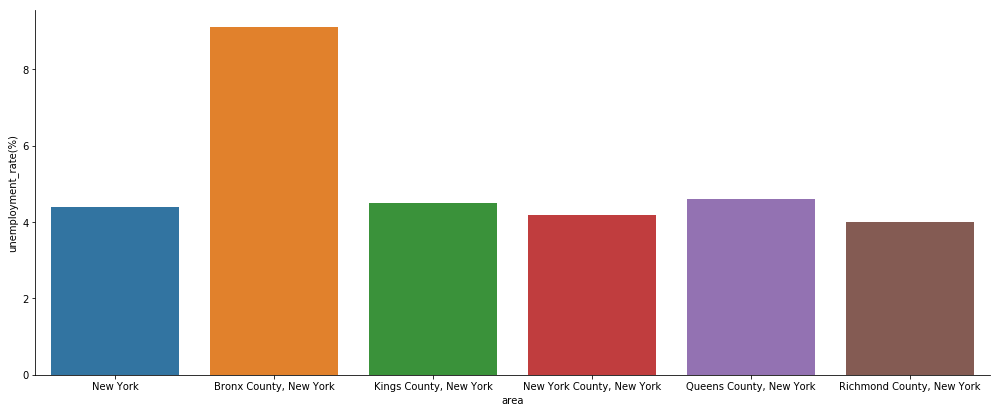

In [6]:
# unemployment rate
g=sns.catplot(x = "area", y = "unemployment_rate(%)", kind = "bar", data = acs19)
g.fig.set_size_inches(18,6)
#plt.xticks(rotation=45)

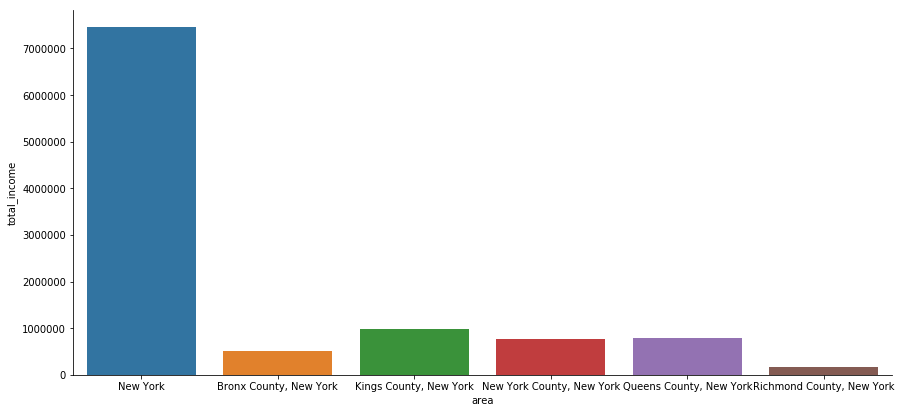

In [7]:
# total income
g=sns.catplot(x = "area", y = "total_income", kind = "bar", data = acs19)
g.fig.set_size_inches(18,6)

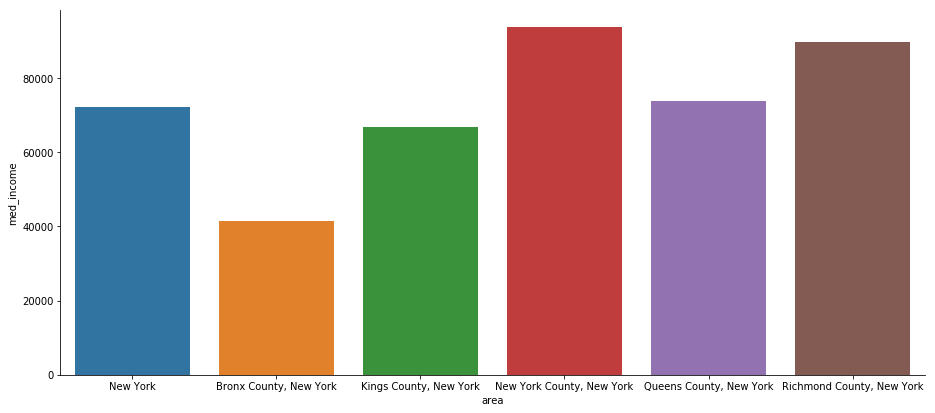

In [8]:
# med income
g=sns.catplot(x = "area", y = "med_income", kind = "bar", data = acs19)
g.fig.set_size_inches(18,6)

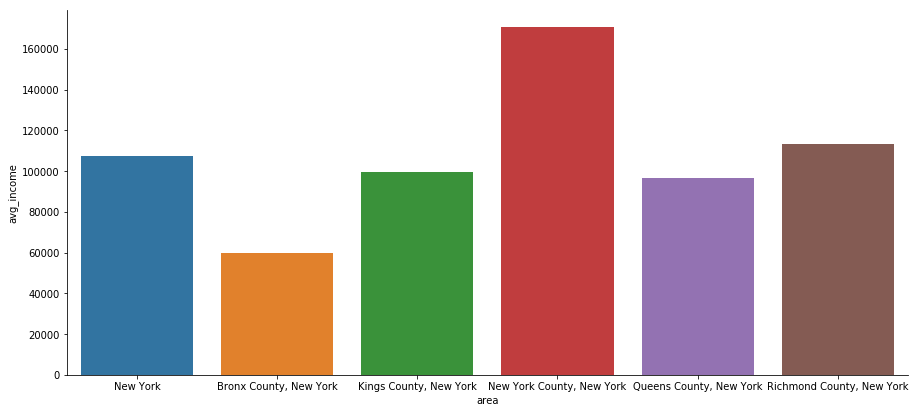

In [9]:
# avg income
g=sns.catplot(x = "area", y = "avg_income", kind = "bar", data = acs19)
g.fig.set_size_inches(18,6)

# Adding Race

In [10]:
acs2 = pd.read_csv("acs_data_nyc.csv", skiprows = 1)
pd.set_option('display.max_columns', None)
acs2
#richmond county is extracted after race is added

,id,Race/Ethnic Group,Population Groups,Geographic Area Name,Estimate!!TOTAL NUMBER OF RACES REPORTED!!Total population,Margin of Error!!TOTAL NUMBER OF RACES REPORTED!!Total population,Estimate!!TOTAL NUMBER OF RACES REPORTED!!Total population!!One race,Margin of Error!!TOTAL NUMBER OF RACES REPORTED!!Total population!!One race,Estimate!!TOTAL NUMBER OF RACES REPORTED!!Total population!!Two races,Margin of Error!!TOTAL NUMBER OF RACES REPORTED!!Total population!!Two races,Estimate!!TOTAL NUMBER OF RACES REPORTED!!Total population!!Three races,Margin of Error!!TOTAL NUMBER OF RACES REPORTED!!Total population!!Three races,Estimate!!TOTAL NUMBER OF RACES REPORTED!!Total population!!Four or more races,Margin of Error!!TOTAL NUMBER OF RACES REPORTED!!Total population!!Four or more races,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Under 5 years,Margin of Error!!SEX AND AGE!!Total population!!Under 5 years,Estimate!!SEX AND AGE!!Total population!!5 to 17 years,Margin of Error!!SEX AND AGE!!Total population!!5 to 17 years,Estimate!!SEX AND AGE!!Total population!!18 to 24 years,Margin of Error!!SEX AND AGE!!Total population!!18 to 24 years,Estimate!!SEX AND AGE!!Total population!!25 to 34 years,Margin of Error!!SEX AND AGE!!Total population!!25 to 34 years,Estimate!!SEX AND AGE!!Total population!!35 to 44 years,Margin of Error!!SEX AND AGE!!Total population!!35 to 44 years,Estimate!!SEX AND AGE!!Total population!!45 to 54 years,Margin of Error!!SEX AND AGE!!Total population!!45 to 54 years,Estimate!!SEX AND AGE!!Total population!!55 to 64 years,Margin of Error!!SEX AND AGE!!Total population!!55 to 64 years,Estimate!!SEX AND AGE!!Total population!!65 to 74 years,Margin of Error!!SEX AND AGE!!Total population!!65 to 74 years,Estimate!!SEX AND AGE!!Total population!!75 years and over,Margin of Error!!SEX AND AGE!!Total population!!75 years and over,Estimate!!SEX AND AGE!!Total population!!Median age (years),Margin of Error!!SEX AND AGE!!Total population!!Median age (years),Estimate!!SEX AND AGE!!Total population!!18 years and over,Margin of Error!!SEX AND AGE!!Total population!!18 years and over,Estimate!!SEX AND AGE!!Total population!!21 years and over,Margin of Error!!SEX AND AGE!!Total population!!21 years and over,Estimate!!SEX AND AGE!!Total population!!62 years and over,Margin of Error!!SEX AND AGE!!Total population!!62 years and over,Estimate!!SEX AND AGE!!Total population!!65 years and over,Margin of Error!!SEX AND AGE!!Total population!!65 years and over,Estimate!!SEX AND AGE!!Total population!!Under 18 years,Margin of Error!!SEX AND AGE!!Total population!!Under 18 years,Estimate!!SEX AND AGE!!Total population!!Under 18 years!!Male,Margin of Error!!SEX AND AGE!!Total population!!Under 18 years!!Male,Estimate!!SEX AND AGE!!Total population!!Under 18 years!!Female,Margin of Error!!SEX AND AGE!!Total population!!Under 18 years!!Female,Estimate!!SEX AND AGE!!Total population!!18 years and over.1,Margin of Error!!SEX AND AGE!!Total population!!18 years and over.1,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Male,Margin of Error!!SEX AND AGE!!Total population!!18 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Female,Margin of Error!!SEX AND AGE!!Total population!!18 years and over!!Female,Estimate!!SEX AND AGE!!Total population!!18 to 34 years,Margin of Error!!SEX AND AGE!!Total population!!18 to 34 years,Estimate!!SEX AND AGE!!Total population!!18 to 34 years!!Male,Margin of Error!!SEX AND AGE!!Total population!!18 to 34 years!!Male,Estimate!!SEX AND AGE!!Total population!!18 to 34 years!!Female,Margin of Error!!SEX AND AGE!!Total population!!18 to 34 years!!Female,Estimate!!SEX AND AGE!!Total population!

In [11]:
acs2 = acs2[[ "Geographic Area Name",
       "Population Groups",
       "Estimate!!TOTAL NUMBER OF RACES REPORTED!!Total population",
       "Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed!!Unemployment Rate",  
       "Estimate!!INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Households!!Median household income (dollars)"
           ]].copy()
acs2.head()

,Geographic Area Name,Population Groups,Estimate!!TOTAL NUMBER OF RACES REPORTED!!Total population,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed!!Unemployment Rate,Estimate!!INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Households!!Median household income (dollars)
0,New York,White alone,12293680,3.6,80589
1,New York,Black or African American alone,3084304,6.9,51146
2,New York,"American Indian and Alaska Native alone (300, ...",73560,3.7,44104
3,New York,Asian alone (400-499),1680219,3.9,81383
4,New York,Some other race alone,1664223,6.3,48234


In [12]:
acs2.rename(columns = {"Geographic Area Name": "Area", "Population Groups":"race",
    "Estimate!!TOTAL NUMBER OF RACES REPORTED!!Total population":"race_pop",
    "Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed!!Unemployment Rate":"unemployment_rate(%)",
    "Estimate!!INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Households!!Median household income (dollars)":"med_income"
                            },
   inplace = True)

In [14]:
race_map = {"White alone":"White", 
           "Black or African American alone":"Black or African American",
           "American Indian and Alaska Native alone (300, A01-Z99)":"Native American and Native Alaskan",
           "Asian alone (400-499)":"Asian",
           "Native Hawaiian and Other Pacific Islander alone (500-599)": "Native Hawaiian and Pacific Islander",
           "Some other race alone":"Other"}
acs2["race"] = acs2["race"].map(race_map)
acs2

,Area,race,race_pop,unemployment_rate(%),med_income
0,New York,White,12293680,3.6,80589
1,New York,Black or African American,3084304,6.9,51146
2,New York,Native American and Native Alaskan,73560,3.7,44104
3,New York,Asian,1680219,3.9,81383
4,New York,Other,1664223,6.3,48234
5,"Bronx County, New York",White,321736,6.8,48403
6,"Bronx County, New York",Black or African American,542543,11.0,41343
7,"Bronx County, New York",Other,429572,8.6,35770
8,"Kings County, New York",White,1115915,3.8,85308
9,"Kings County, New York",Black or African American,820016,5.8,51899


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

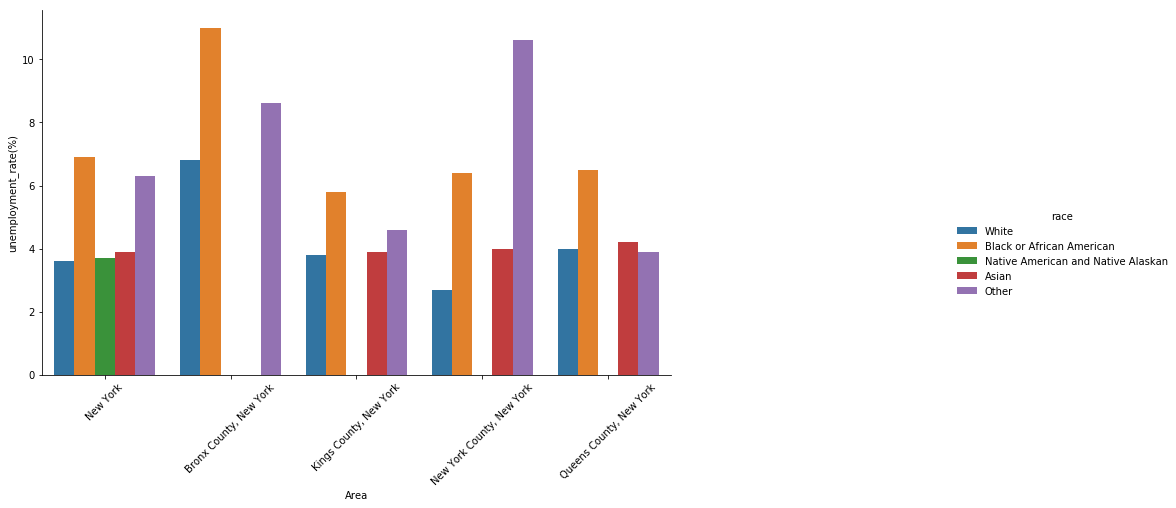

In [18]:
# unemployment rate by race
g=sns.catplot(x = "Area", y = "unemployment_rate(%)",hue = "race",kind = "bar", data = acs2)
g.fig.set_size_inches(18,6)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

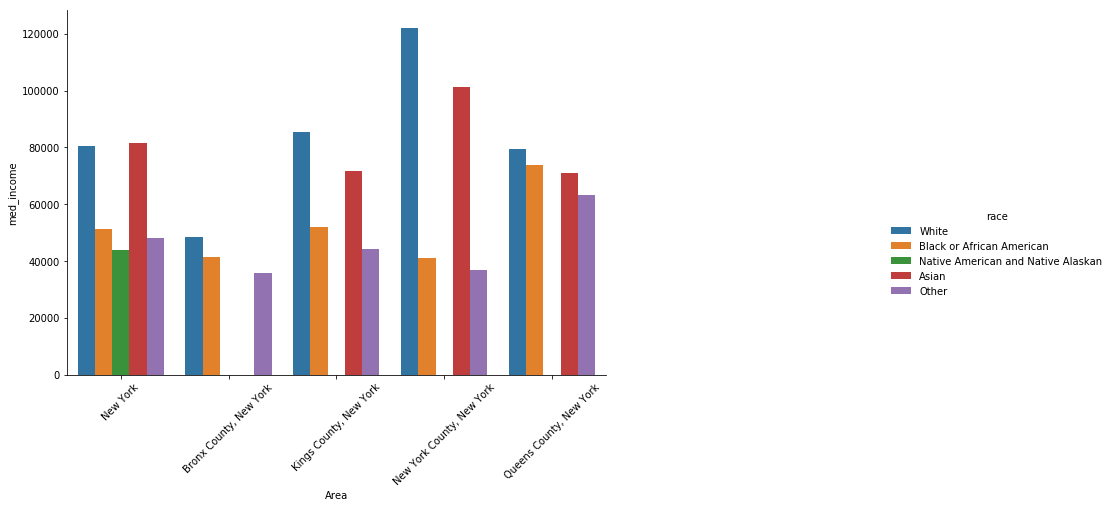

In [17]:
# med income by race
g=sns.catplot(x = "Area", y = "med_income",hue = "race", kind = "bar", data = acs2)
g.fig.set_size_inches(18,6)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

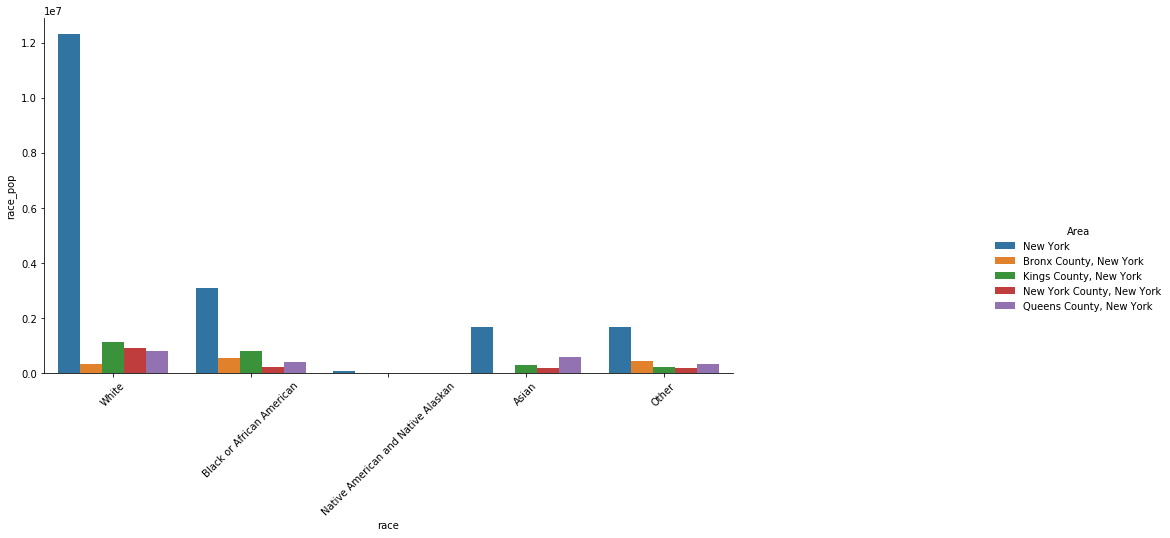

In [22]:
# pop by race
g=sns.catplot(x = "race", y = "race_pop", hue = "Area",kind = "bar", data = acs2)
g.fig.set_size_inches(18,6)
plt.xticks(rotation=45)